# LAB 3: Probability Distributions and Central Limit Theorem

In this lab you will use python to study the following topics:

- How to sample from different distributions functions.
- Calculate arthemitic mean, sample variance, and sample standard deviation for different distributions functions.
- How to simulate central limit theorem for different distributions functions.

# First: you should run this cell

In [1]:
# Make all numpy available via shorter 'np' prefix
import numpy as np


# matplotlib library
import matplotlib.pyplot as plt

# Problem 1
a) Use the numpy function [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to generate a standard Gaussian random variable $X$ (zero mean and unit variance).

- Use histogram to plot the estimated PDF of the random variable $X$
- Compute the true "analytical" PDF of $X$ . Plot the true PDF on the top of the histogram figure.
- Calculate the sample mean and the sample variance.

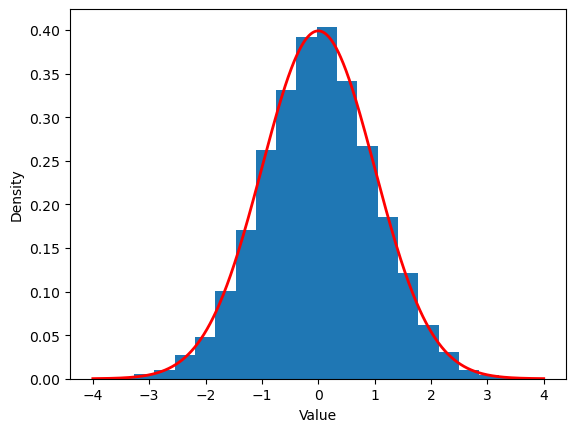

Sample mean: 0.0076
Sample variance: 1.0113


In [2]:
from scipy.stats import norm
n = 10000
bins=20
samples = np.random.normal(size=n)

s_mean = np.mean(samples)
s_variance = np.var(samples)  
count, bin_edges, ignored = plt.hist(samples,bins=bins ,density=True)

x = np.linspace(-4, 4, 1000)
true_pdf = norm.pdf(x)

plt.plot(x, true_pdf, 'r', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

print(f"Sample mean: {s_mean:.4f}")
print(f"Sample variance: {s_variance:.4f}")


b) Repeat (a) for a Gaussian random variable $Y$ with $mean=3$ and $variance=4$. 

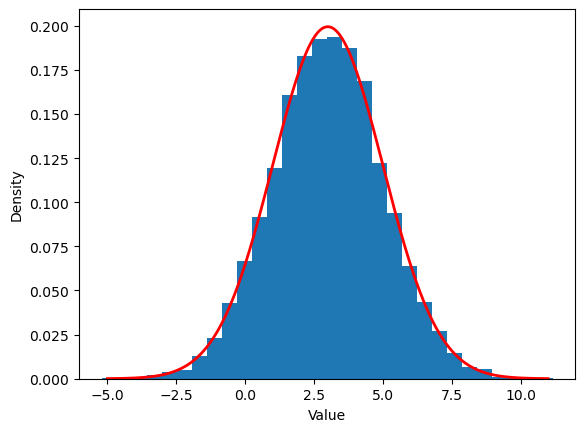

Sample mean: 3.0047
Sample variance: 4.0165


In [3]:
n = 10000  
mean = 3
variance = 4
std_dev = np.sqrt(variance)
bins = 30 
samples = np.random.normal(loc=mean, scale=std_dev, size=n)

s_mean = np.mean(samples)
s_variance = np.var(samples)  

count, bin_edges, ignored = plt.hist(samples, bins=bins, density=True)


x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
true_pdf = norm.pdf(x, loc=mean, scale=std_dev)

plt.plot(x, true_pdf, 'r', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


print(f"Sample mean: {s_mean:.4f}")
print(f"Sample variance: {s_variance:.4f}")

C) Repeat (a) for an exponential random variable with $\lambda = 1$ using the numpy function [numpy.random.exponential](https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html)

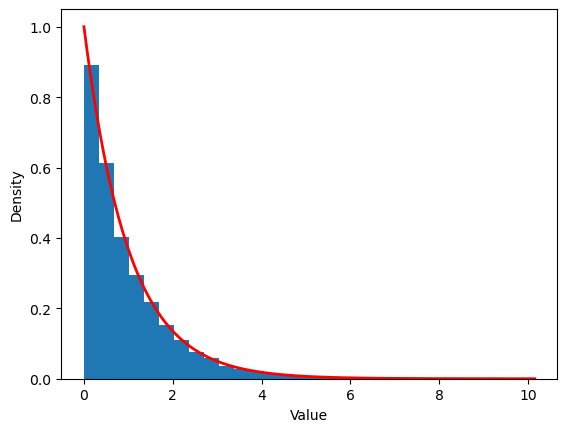

Sample mean: 0.9805
Sample variance: 0.9999


In [4]:
n = 10000 
lambda_param = 1  
bins = 30 

samples = np.random.exponential(scale=1/lambda_param, size=n)

s_mean = np.mean(samples)
s_variance = np.var(samples, ddof=1) 

count, bin_edges, ignored = plt.hist(samples, bins=bins, density=True)

x = np.linspace(0, np.max(samples), 1000)
true_pdf = lambda_param * np.exp(-lambda_param * x)

plt.plot(x, true_pdf, 'r', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')

plt.show()

print(f"Sample mean: {s_mean:.4f}")
print(f"Sample variance: {s_variance:.4f}")

d) Repeat (a) for an exponential random variable with $\lambda = 0.5$

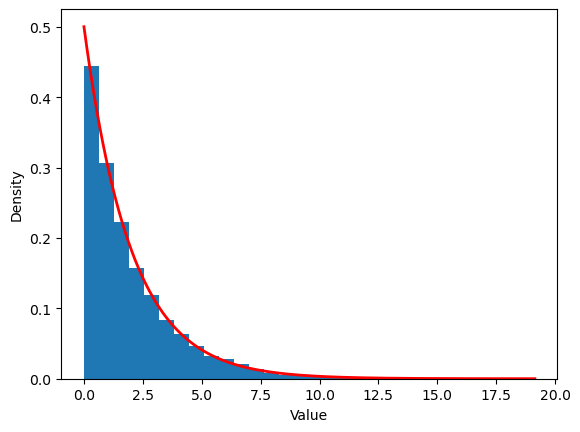

Sample mean: 1.9987
Sample variance: 4.1337


In [5]:
n = 10000  
lambda_param = 0.5  
bins = 30

samples = np.random.exponential(scale=1/lambda_param, size=n)

s_mean = np.mean(samples)
s_variance = np.var(samples)  

count, bin_edges, ignored = plt.hist(samples, bins=bins, density=True)

x = np.linspace(0, np.max(samples), 1000)
true_pdf = lambda_param * np.exp(-lambda_param * x)

plt.plot(x, true_pdf, 'r', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

print(f"Sample mean: {s_mean:.4f}")
print(f"Sample variance: {s_variance:.4f}")

# Problem 2: Practicing the Central Limit Theorem
Use Python to simulate the Central Limit Theorem for the following random i.i.d variables and check that the higher the number of number the variables, the more the mean of subsets behave like a gaussian random variable.

a) Exponential random variable with $\lambda = 0.5$

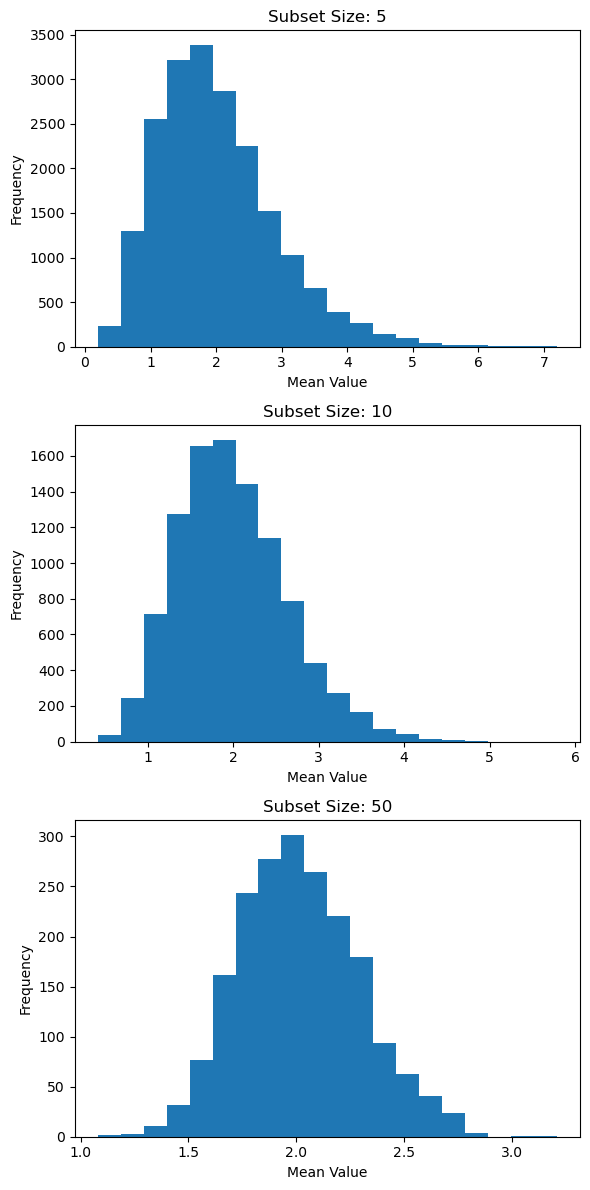

In [12]:
n = 100000 
lambda_param = 0.5 
subset_sizes = [5,10, 50]

data = np.random.exponential(scale=1/lambda_param, size=n)

fig, axes = plt.subplots(len(subset_sizes), 1,figsize=(6, 4 * len(subset_sizes)))

for i, size in enumerate(subset_sizes):
    num_subsets = n // size
    subset_means = [np.mean(np.random.choice(data, size=size, replace=False)) for _ in range(num_subsets)]
    
    axes[i].hist(subset_means, bins=20)
    axes[i].set_title(f'Subset Size: {size}')
    axes[i].set_xlabel('Mean Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



b) Binomial random variable with $n = 20$ and $p = 0.2$

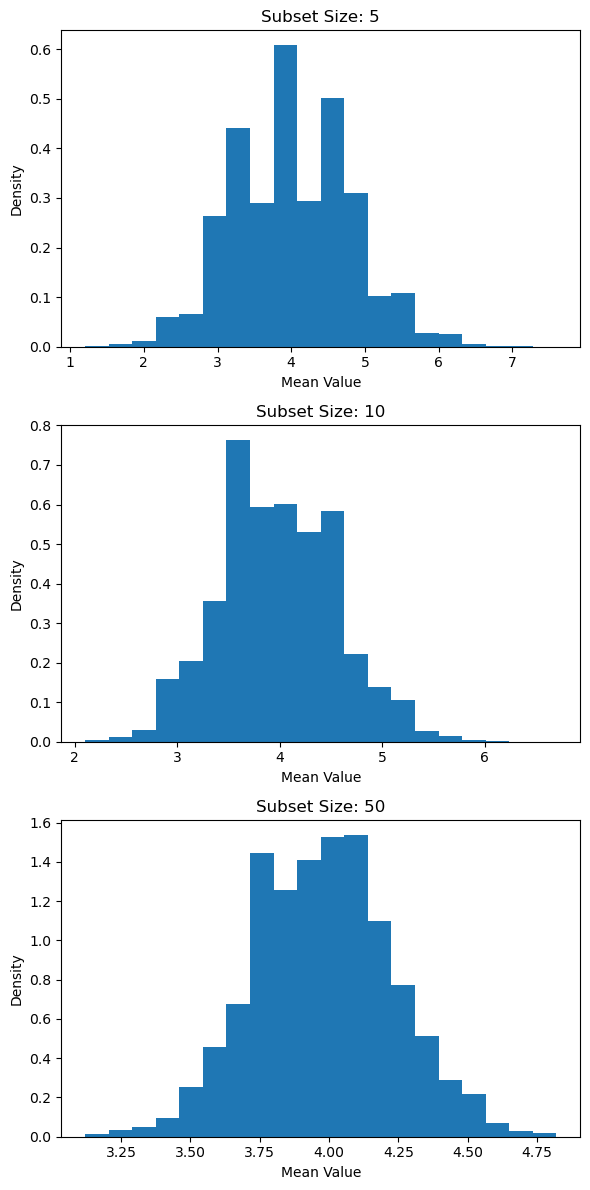

In [7]:
total_samples = 100000  
n_binomial = 20  
p_binomial = 0.2  
subset_sizes = [5, 10, 50] 

data = np.random.binomial(n=n_binomial, p=p_binomial, size=total_samples)


fig, axes = plt.subplots(len(subset_sizes), 1, figsize=(6, 4 * len(subset_sizes)))

for i, size in enumerate(subset_sizes):
    num_subsets = total_samples // size
    subset_means = [np.mean(np.random.choice(data, size=size, replace=False)) for _ in range(num_subsets)]
    
    axes[i].hist(subset_means, bins=20, density=True)
    axes[i].set_title(f'Subset Size: {size}')
    axes[i].set_xlabel('Mean Value')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

c) Uniform random variable with $a = 2$ and $b = 8$

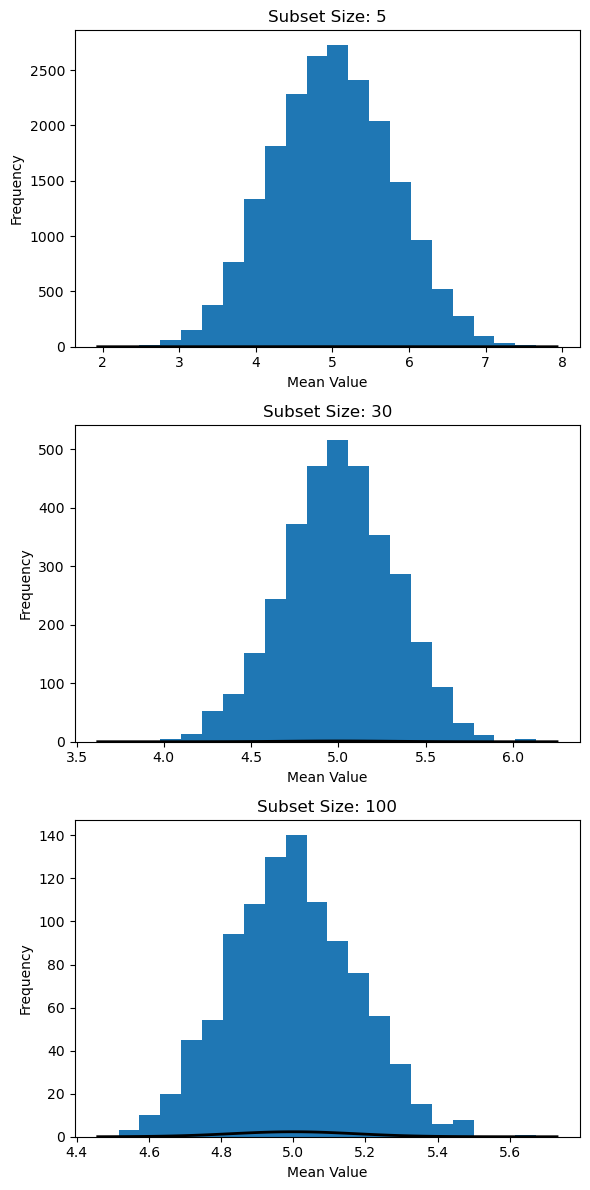

In [14]:

num_samples = 100000  
a = 2  
b = 8  
subset_sizes = [5, 30, 100] 

data = np.random.uniform(low=a, high=b, size=num_samples)

fig, axes = plt.subplots(len(subset_sizes), 1, figsize=(6, 4 * len(subset_sizes)))

for i, size in enumerate(subset_sizes):
    num_subsets = num_samples // size
    subset_means = [np.mean(np.random.choice(data, size=size, replace=False)) for _ in range(num_subsets)]
    
    count, bin_edges, ignored = axes[i].hist(subset_means, bins=20)
    
    mu = (a + b) / 2  
    sigma = np.sqrt(((b - a) ** 2) / 12 / size)  
    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))
    axes[i].plot(x, p, 'k', linewidth=2)
    
    axes[i].set_title(f'Subset Size: {size}')
    axes[i].set_xlabel('Mean Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

